# Decision Trees

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('../datasets/titanic.csv')

In [3]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]
ds = ds.drop(columns_to_drop, axis=1)
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
def quantify_sex(sex):
    if sex.lower().startswith('m'):
        return 0
    elif sex.lower().startswith('f'):
        return 1
    else:
        return sex
    
ds['Sex'] = ds['Sex'].apply(quantify_sex)

In [7]:
ds = ds.dropna()
# or fill nas ds['Age'].fillna(ds['Age'].mean())

In [8]:
ds = ds.reset_index(drop=True)
ds.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [9]:
ds.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182
Sex,0.538826,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000


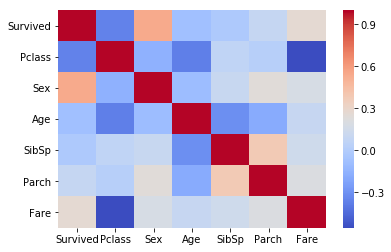

In [10]:
plt.figure()
sns.heatmap(ds.corr(), cmap='coolwarm')
plt.show()

In [11]:
ds.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
X, y = ds[[each for each in ds.columns if each != "Survived"]], ds["Survived"]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
Pclass    714 non-null int64
Sex       714 non-null int64
Age       714 non-null float64
SibSp     714 non-null int64
Parch     714 non-null int64
Fare      714 non-null float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


In [14]:
ds[ds.columns[0]]

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      1
8      1
9      1
10     1
11     0
12     0
13     0
14     1
15     0
16     0
17     0
18     1
19     1
20     1
21     0
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
684    1
685    1
686    1
687    0
688    0
689    1
690    0
691    1
692    1
693    0
694    1
695    0
696    1
697    0
698    0
699    1
700    1
701    0
702    0
703    1
704    1
705    0
706    0
707    0
708    0
709    0
710    0
711    1
712    1
713    0
Name: Survived, Length: 714, dtype: int64

In [168]:
(ds['Survived'] == 0).sum()

424

In [169]:
CATEGORICAL_COLUMNS = {'Pclass': [1,2,3], 'Sex': [0,1]}
CONTINUOUS_COLUMNS = [each for each in X if each not in CATEGORICAL_COLUMNS]
print(CONTINUOUS_COLUMNS)

['Age', 'SibSp', 'Parch', 'Fare']


In [302]:
class DecisionTreeNode:
    def __init__(self, data, depth):
        self.data = data
        self.left = None
        self.right = None
        self.feature = None # Feature the node is split on
        self.value = None # Value of the feature on which data is split
        self.depth = depth

    @staticmethod
    def split_data_binarily(data, col, val):
        left_data, right_data = list(), list()
        for index in data.index:
            row = data.loc[index]
            if row[col] <= val:
                left_data.append(row)
            else:
                right_data.append(row)
                
        left_df = pd.DataFrame(left_data, columns=data.columns).reset_index(drop=True)
        right_df = pd.DataFrame(right_data, columns=data.columns).reset_index(drop=True)
        return (left_df, right_df)
     
    @staticmethod
    def split_data_categorically(data, col, val, categorical_columns):  
        left_data, right_data = list(), list()

        for index in data.index:
            row = data.loc[index]
            if col in categorical_columns:
                if row[col] == val:
                    left_data.append(row)
                else:
                    right_data.append(row)
            else:
                if row[col] <= val:
                    left_data.append(row)
                else:
                    right_data.append(row)

        left_df = pd.DataFrame(left_data, columns=data.columns).reset_index(drop=True)
        right_df = pd.DataFrame(right_data, columns=data.columns).reset_index(drop=True)
        return (left_df, right_df)
    
    
    def split(self, col, val, categorical_split=False, categorical_columns=None):
        if categorical_split and not categorical_columns:
            raise Exception("Need categorical columns to split data categorically.")
        
        self.categorical_split = categorical_split
        self.categorical_columns = categorical_columns
        self.feature = col
        self.value = val
        left, right = None, None
        if self.categorical_split:
            left_data, right_data = DecisionTreeNode.split_data_categorically(self.data, col, val,categorical_columns)
        else:
            left_data, right_data = DecisionTreeNode.split_data_binarily(self.data, col, val)
#         if not(left_data.shape[0] == 0 or right_data.shape[0] == 0):
#             self.feature = col
#             self.value = val
        return (left_data, right_data)
    
    
    @property
    def is_leaf(self):
        return not(self.left or self.right)

In [321]:
class DecisionTree:
    
    def __init__(self, max_depth=10, split_categorically=False, categorical_columns=None):        
        self.data = None
        self.root = None
        self.target = {'column': None, 'value': None}
        self.max_depth = max_depth
        self.split_categorically = split_categorically
        self.categorical_columns = categorical_columns
        
        
    def information_gain(self, parent, left, right, criterion='entropy'):
        l = left.shape[0] / parent.shape[0]
        r = 1 - l
        gain = None
        if criterion == 'entropy':
            gain = self.entropy(parent) - (l * self.entropy(left) + r * self.entropy(right))
        return gain
    
    
    def entropy(self, system):
        target_col = self.target['column']
        total = system.shape[0]
        klasses, counts = np.unique(system[target_col].values, return_counts=True)
        ent = 0
        for i,klass in enumerate(klasses):
            p = counts[i] / total
            ent += (-1 * p * np.log2(p))
        return ent
    
    
    def get_best_split(self, node, criterion='entropy'):
        if self.split_categorically:
            gains = []
            for col in node.data.columns:
                if col == self.target['column']:
                    continue
                
                if col in self.categorical_columns:
                    for val in self.categorical_columns[col]:
                        left_data, right_data = DecisionTreeNode.split_data_categorically(node.data, col, val, self.categorical_columns)
                        info_gain = self.information_gain(node.data, left_data, right_data, criterion)
                        gains.append((info_gain, col, val))
                else:
                    val = node.data[col].mean()
                    left_data, right_data = DecisionTreeNode.split_data_binarily(node.data, col, val)
                    info_gain = self.information_gain(node.data, left_data, right_data, criterion)
                    gains.append((info_gain, col, val))
            return sorted(gains, key=lambda x: x[0], reverse=True)[0]
        
        else:
            gains = []
            for col in node.data.columns:
                if col == self.target['column']:
                    continue
                
                val = node.data[col].mean()
                left_data, right_data = DecisionTreeNode.split_data_binarily(node.data, col, val)
                info_gain = self.information_gain(node.data, left_data, right_data, criterion)
                gains.append((info_gain, col, val))
            return sorted(gains, key=lambda x: x[0], reverse=True)[0]
        
        
    def create_tree(self, data, depth):
        print(depth)
        if depth >= self.max_depth:
            return None
        
        node = DecisionTreeNode(data, depth)
        gain, col, val = self.get_best_split(node)
        left_data, right_data = node.split(col, val, self.split_categorically, self.categorical_columns)
        if left_data.shape[0] == 0 or right_data.shape[0] == 0:
            return None
        node.left = self.create_tree(left_data, depth+1)
        node.right = self.create_tree(right_data, depth+1)
        return node
    
    
    def train(self, data, target):
        self.data = data
        self.target = target
        depth = 0
        self.root = self.create_tree(data, depth)
        
    @staticmethod
    def traverse(node, depth=0):
        for i in range(depth):
            print(" "*i, "|", end='')
        print(" "*depth, "|", end='') 
        if node is None:
            print("None")
            return
        print(node.feature, node.value, node.data.shape[0])
        if node.is_leaf:
            return
        DecisionTree.traverse(node.left, node.depth)
        DecisionTree.traverse(node.right, node.depth)
        
        
    def predict(self, test):
        decision_node = self.root
        target_col = self.target['column']

        while not decision_node.is_leaf:
            if self.split_categorically:
                if test[target_col] == decision_node.value:
                    decision_node = decision_node.left
                else:
                    decision_node = decision_node.right
            else:
                if test[target_col] <= decision_node.value:
                    decision_node = decision_node.left
                else:
                    decision_node = decision_node.right
        # Taking Decision
        klasses, counts = np.unique(decision_node.data[target_col].values, return_counts=True)
        print(klasses, counts)
        return klasses[counts.argmax()]
    
    def score(self, labels, y_test):
        return (labels == y_test).sum() / y_test.shape[0]

In [322]:
split = int(0.8 * ds.shape[0])
training_data = ds[:split].copy().reset_index(drop=True)
testing_data = ds[split:].copy().reset_index(drop=True)
dt = DecisionTree(max_depth=5)#, split_categorically=True, categorical_columns=CATEGORICAL_COLUMNS)
dt.train(training_data, target={'column': 'Survived', 'value': 1})

0
1
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5
1
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5


In [323]:
DecisionTree.traverse(dt.root)

 |Sex 0.36777583187390545 571
 |Fare 28.257881994459833 361
 |  |Fare 12.418069696969695 264
 |  |   |Parch 0.02976190476190476 168
 |  |   |    |SibSp 0.08588957055214724 163
 |  |   |    |Pclass 2.8 5
 |  |   |Parch 0.3229166666666667 96
 |  |   |    |Pclass 1.9189189189189189 74
 |  |   |    |Age 23.318181818181817 22
 |  |SibSp 1.0721649484536082 97
 |  |   |Age 38.71103896103896 77
 |  |   |    |Pclass 1.375 40
 |  |   |    |Parch 0.4864864864864865 37
 |  |   |Pclass 2.5 20
 |  |   |    |SibSp 2.142857142857143 7
 |  |   |    |Fare 38.192307692307686 13
 |Pclass 2.080952380952381 210
 |  |Age 30.830708661417322 127
 |  |   |SibSp 0.5606060606060606 66
 |  |   |    |Pclass 1.5135135135135136 37
 |  |   |    |SibSp 1.2758620689655173 29
 |  |   |SibSp 0.4262295081967213 61
 |  |   |    |Fare 80.29120277777778 36
 |  |   |    |Pclass 1.24 25
 |  |SibSp 0.9036144578313253 83
 |  |   |Age 23.186046511627907 43
 |  |   |    |Parch 0.4166666666666667 24
 |  |   |    |Age 33.052631578947

In [324]:
dt.root.feature, dt.root.value # Root

('Sex', 0.36777583187390545)

In [325]:
print(dt.root.left.feature, dt.root.left.value)
print(dt.root.right.feature, dt.root.right.value)
print('-'*20)
print(dt.root.left.left.feature, dt.root.left.left.value)
print(dt.root.left.right.feature, dt.root.left.right.value)
print('-'*20)
print(dt.root.right.left.feature, dt.root.right.left.value)
print(dt.root.right.right.feature, dt.root.right.right.value)

Fare 28.257881994459833
Pclass 2.080952380952381
--------------------
Fare 12.418069696969695
SibSp 1.0721649484536082
--------------------
Age 30.830708661417322
SibSp 0.9036144578313253


In [326]:
testing_data = ds[split:]
for ix in testing_data.index[10:20]:
    print (dt.predict(testing_data.loc[ix]))
    print (testing_data.loc[ix])
    print ('-'*80)

[0. 1.] [ 4 25]
1.0
Survived      1.0000
Pclass        1.0000
Sex           1.0000
Age          29.0000
SibSp         0.0000
Parch         0.0000
Fare        211.3375
Name: 581, dtype: float64
--------------------------------------------------------------------------------
[0. 1.] [140  23]
0.0
Survived     0.0000
Pclass       3.0000
Sex          0.0000
Age         11.0000
SibSp        0.0000
Parch        0.0000
Fare        18.7875
Name: 582, dtype: float64
--------------------------------------------------------------------------------
[0. 1.] [140  23]
0.0
Survived     0.0
Pclass       2.0
Sex          0.0
Age         23.0
SibSp        0.0
Parch        0.0
Fare        13.0
Name: 583, dtype: float64
--------------------------------------------------------------------------------
[0. 1.] [140  23]
0.0
Survived     0.0
Pclass       2.0
Sex          0.0
Age         23.0
SibSp        0.0
Parch        0.0
Fare        13.0
Name: 584, dtype: float64
------------------------------------------

In [327]:
labels = []
for i in testing_data.index:
    labels.append(dt.predict(testing_data.loc[i]))
labels = np.array(labels)
labels[:10]

[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [ 4 25]
[0. 1.] [ 4 25]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0. 1.] [140  23]
[0. 1.] [ 4 25]
[0

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])

In [319]:
actual_labels = testing_data['Survived'].values
actual_labels[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [320]:
dt.score(actual_labels, labels)

1.0